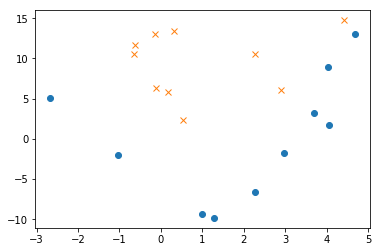

In [11]:
import numpy as np
import matplotlib.pyplot as plt

train = np.loadtxt('s4_s4_data.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], 'x')
plt.show()

In [12]:
# パラメータを初期化
theta = np.random.rand(4)

# 標準化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# x0とx3を加える

def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    x3 = x[:,0,np.newaxis] ** 2
    return np.hstack([x0, x, x3])

X = to_matrix(train_z)

In [13]:
# シグモイド関数

def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))


# 学習率
ETA = 1e-3

# 繰り返し回数
epoch = 5000

for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
   

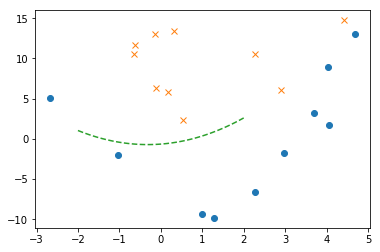

In [15]:
x1 = np.linspace(-2, 2, 100) 
x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2 ) / theta[2]

plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], 'x')
plt.plot(x1, x2, linestyle='dashed')
plt.show()

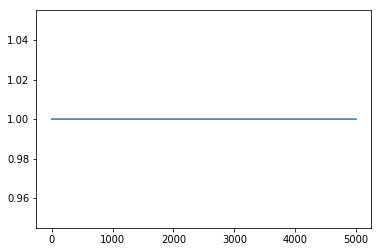

In [17]:
# 確率をそのままだすとピンとこないのでしきい値を決めて1 or 0を返す
def classify(x):
    return (f(x) >= 0.5).astype(np.int)

# パラメータを初期化
tehta = np.random.rand(4)

# 精度の履歴
accuracies = []

for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 現在の精度を計算
    result = classify(X) == train_y
    accuracy = len(result[result == True]) / len(result)
    accuracies.append(accuracy)
    
# 精度をプロット
x = np.arange(len(accuracies))

plt.plot(x, accuracies)
plt.show()